In [2]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

data1 = {'country': ['A', 'B', 'C', 'D', 'E'],
         'gdp_per_capita': [45000, 42000, 52000, 49000, 47000]
         }
df1 = pd.DataFrame(data1)

data2 = {'year': [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010],
         'unemployment_rate': [9.8, 12, 8, 7.2, 6.9, 7, 6.5, 6.2, 5.5, 6.3]
         }  
df2 = pd.DataFrame(data2)

data3 = {'interest_rate': [5, 5.5, 6, 5.5, 5.25, 6.5, 7, 8, 7.5, 8.5],
         'index_price': [1500, 1520, 1525, 1523, 1515, 1540, 1545, 1560, 1555, 1565]
         }
df3 = pd.DataFrame(data3)

root = tk.Tk()

figure1 = plt.Figure(figsize=(6, 5), dpi=100)
ax1 = figure1.add_subplot(111)
bar1 = FigureCanvasTkAgg(figure1, root)
bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
df1 = df1[['country', 'gdp_per_capita']].groupby('country').sum()
df1.plot(kind='bar', legend=True, ax=ax1)
ax1.set_title('Country Vs. GDP Per Capita')

figure2 = plt.Figure(figsize=(5, 4), dpi=100)
ax2 = figure2.add_subplot(111)
line2 = FigureCanvasTkAgg(figure2, root)
line2.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
df2 = df2[['year', 'unemployment_rate']].groupby('year').sum()
df2.plot(kind='line', legend=True, ax=ax2, color='r', marker='o', fontsize=10)
ax2.set_title('Year Vs. Unemployment Rate')

figure3 = plt.Figure(figsize=(5, 4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df3['interest_rate'], df3['index_price'], color='g')
scatter3 = FigureCanvasTkAgg(figure3, root)
scatter3.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
ax3.legend(['index_price'])
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Index Price')

root.mainloop()

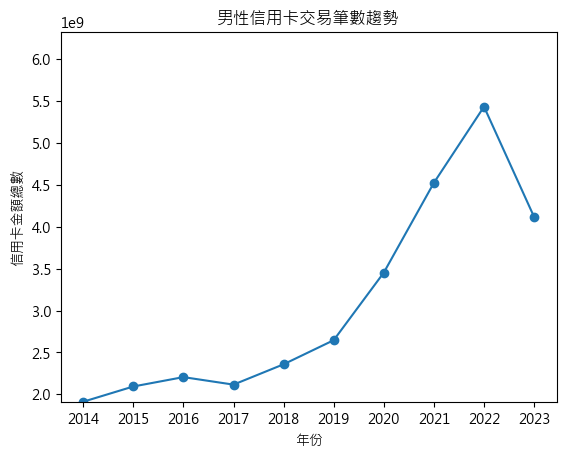

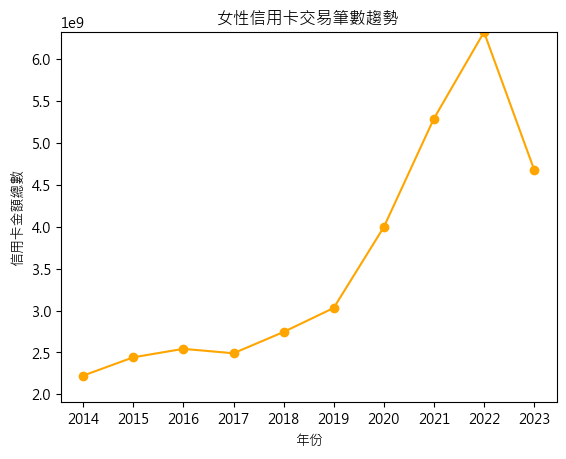

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft JhengHei'

# 連接 SQLite 資料庫
conn = sqlite3.connect("creditcard.db")

# 撰寫 SQL 查詢，計算每年男性信用卡金額總數
sql_male = """
    SELECT 年, SUM(信用卡交易筆數) AS 信用卡交易總筆數
    FROM sex
    WHERE 性別 = '男性'
    GROUP BY 年
"""

sql_female = """
    SELECT 年, SUM(信用卡交易筆數) AS 信用卡交易總筆數
    FROM sex
    WHERE 性別 = '女性'
    GROUP BY 年
"""

# 使用 pandas 的 read_sql_query 方法執行 SQL 查詢，並將結果存入 DataFrame
df_male = pd.read_sql_query(sql_male, conn)
df_female = pd.read_sql_query(sql_female, conn)

# 關閉資料庫連接
conn.close()

# 確定 y 軸的上下限
y_min = min(df_male['信用卡交易總筆數'].min(), df_female['信用卡交易總筆數'].min())
y_max = max(df_male['信用卡交易總筆數'].max(), df_female['信用卡交易總筆數'].max())

# 繪製男性折線圖
plt.figure()
plt.plot(df_male['年'], df_male['信用卡交易總筆數'], marker='o')
plt.title('男性信用卡交易筆數趨勢')
plt.xlabel('年份')
plt.ylabel('信用卡金額總數')
plt.ylim(y_min, y_max)  # 設定 y 軸上下限

# 設定 x 軸刻度為所有年份
plt.xticks(df_male['年'])

# 顯示第一張圖表
plt.show()

# 繪製女性折線圖
plt.figure()
plt.plot(df_female['年'], df_female['信用卡交易總筆數'], marker='o', color='orange')
plt.title('女性信用卡交易筆數趨勢')
plt.xlabel('年份')
plt.ylabel('信用卡金額總數')
plt.ylim(y_min, y_max)  # 設定 y 軸上下限

# 設定 x 軸刻度為所有年份
plt.xticks(df_female['年'])

# 顯示第二張圖表
plt.show()


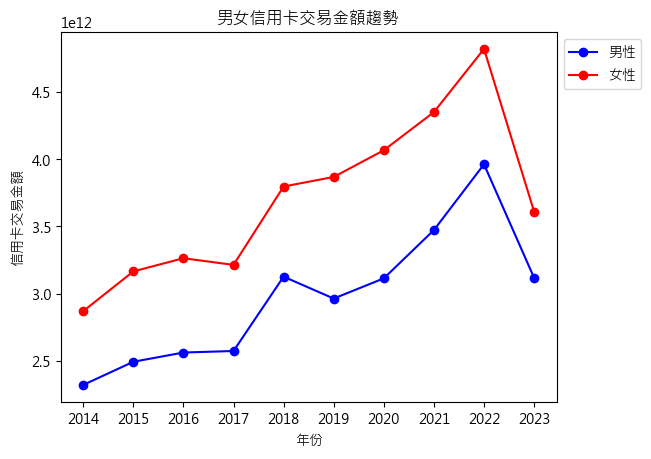

In [4]:
#Sex兩性消費(折線圖)

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft JhengHei'

# 連接 SQLite 資料庫
conn = sqlite3.connect("creditcard.db")

# 撰寫 SQL 查詢，計算每年男性信用卡金額總數
sql_male = """
    SELECT 年, SUM(信用卡金額) AS 信用卡交易總金額
    FROM sex
    WHERE 性別 = '男性'
    GROUP BY 年
"""

sql_female = """
    SELECT 年, SUM(信用卡金額) AS 信用卡交易總金額
    FROM sex
    WHERE 性別 = '女性'
    GROUP BY 年
"""

sql = """
    SELECT DISTINCT 年
    FROM sex
"""

# 使用 pandas 的 read_sql_query 方法執行 SQL 查詢，並將結果存入 DataFrame
df_male = pd.read_sql_query(sql_male, conn)
df_female = pd.read_sql_query(sql_female, conn)
df = pd.read_sql_query(sql, conn)

# 關閉資料庫連接
conn.close()

# 繪製男性折線圖，使用藍色
plt.plot(df_male['年'], df_male['信用卡交易總金額'], marker='o', label='男性', color='blue')

# 繪製女性折線圖，使用紅色
plt.plot(df_female['年'], df_female['信用卡交易總金額'], marker='o', label='女性', color='red')

# 加上標題及標籤
plt.title('男女信用卡交易金額趨勢')
plt.xlabel('年份')
plt.ylabel('信用卡交易金額')
plt.xticks(df['年'])

# 加上圖例
legend = plt.legend()
legend.set_bbox_to_anchor((1, 1))

# 顯示圖表
plt.show()


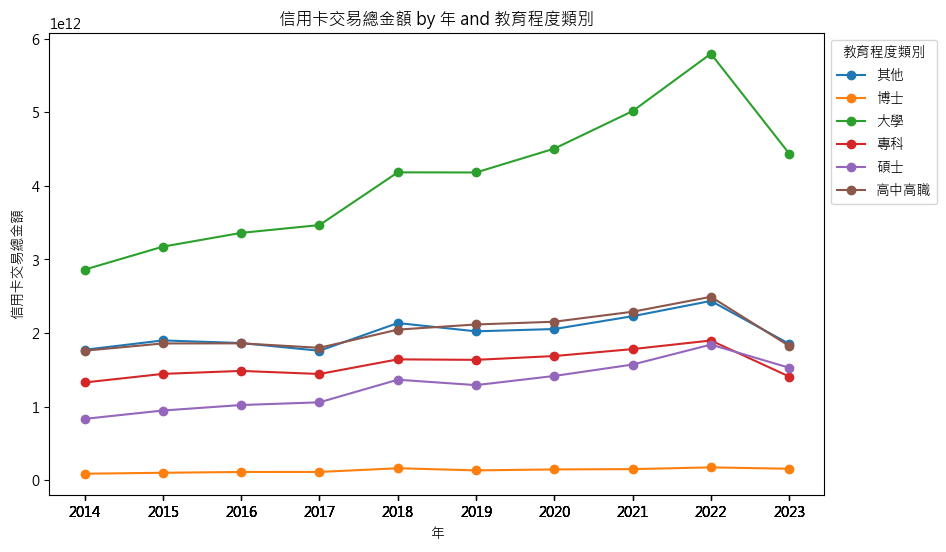

In [5]:
#Education 教育程度消費(折線圖)

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Assuming you have a SQLite database connection
conn = sqlite3.connect("creditcard.db")

# Your SQL query
sql_query = """
SELECT 年, 教育程度類別, SUM(信用卡金額) AS 信用卡交易總金額
FROM education
GROUP BY 年, 教育程度類別
"""

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Pivot the DataFrame for easy plotting
pivot_df = df.pivot(index='年', columns='教育程度類別', values='信用卡交易總金額')

# Plotting the line chart
pivot_df.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6))
plt.title('信用卡交易總金額 by 年 and 教育程度類別')
plt.xlabel('年')
plt.ylabel('信用卡交易總金額')
legend = plt.legend(title='教育程度類別')
legend.set_bbox_to_anchor((1, 1))
plt.xticks(df['年'])
plt.show()


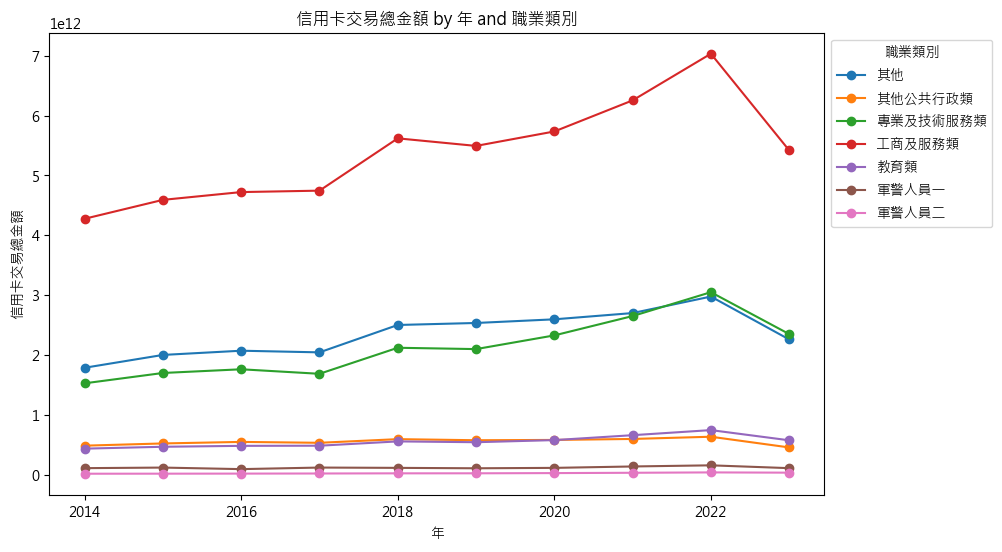

In [6]:
#Job 職業消費(折線圖)
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Assuming you have a SQLite database connection
conn = sqlite3.connect("creditcard.db")

# Your SQL query
sql_query = """
SELECT 年, 職業類別, SUM(信用卡金額) AS 信用卡交易總金額
FROM job
GROUP BY 年, 職業類別
"""

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Pivot the DataFrame for easy plotting
pivot_df = df.pivot(index='年', columns='職業類別', values='信用卡交易總金額')

# Plotting the line chart
pivot_df.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6))
plt.title('信用卡交易總金額 by 年 and 職業類別')
plt.xlabel('年')
plt.ylabel('信用卡交易總金額')
legend = plt.legend(title='職業類別')

legend.set_bbox_to_anchor((1, 1))
plt.show()
